In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
data=pd.read_csv('mushrooms.csv')

# Examining the Data

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Descriptive Statistics

In [7]:
data.shape

(8124, 23)

In [12]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# Visualization

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of poisonous/edible mushrooms')

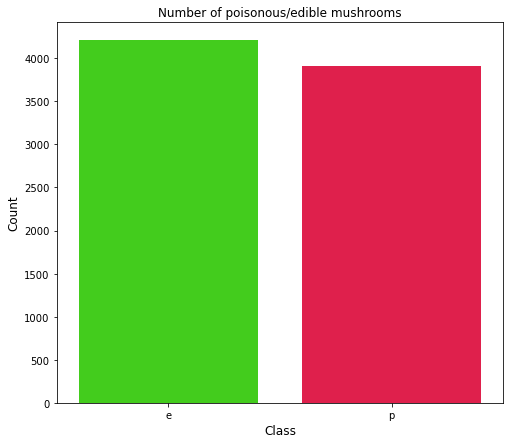

In [16]:
count=data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values,palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')


# Data Manipulation

In [43]:
data=data.astype('category')

In [44]:
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [45]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [25]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [26]:
data['veil-type'].unique()

array([0])

In [ ]:
Column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [46]:
data.drop(['veil-type'],axis=1,inplace=True)

# Correlation Between the variables

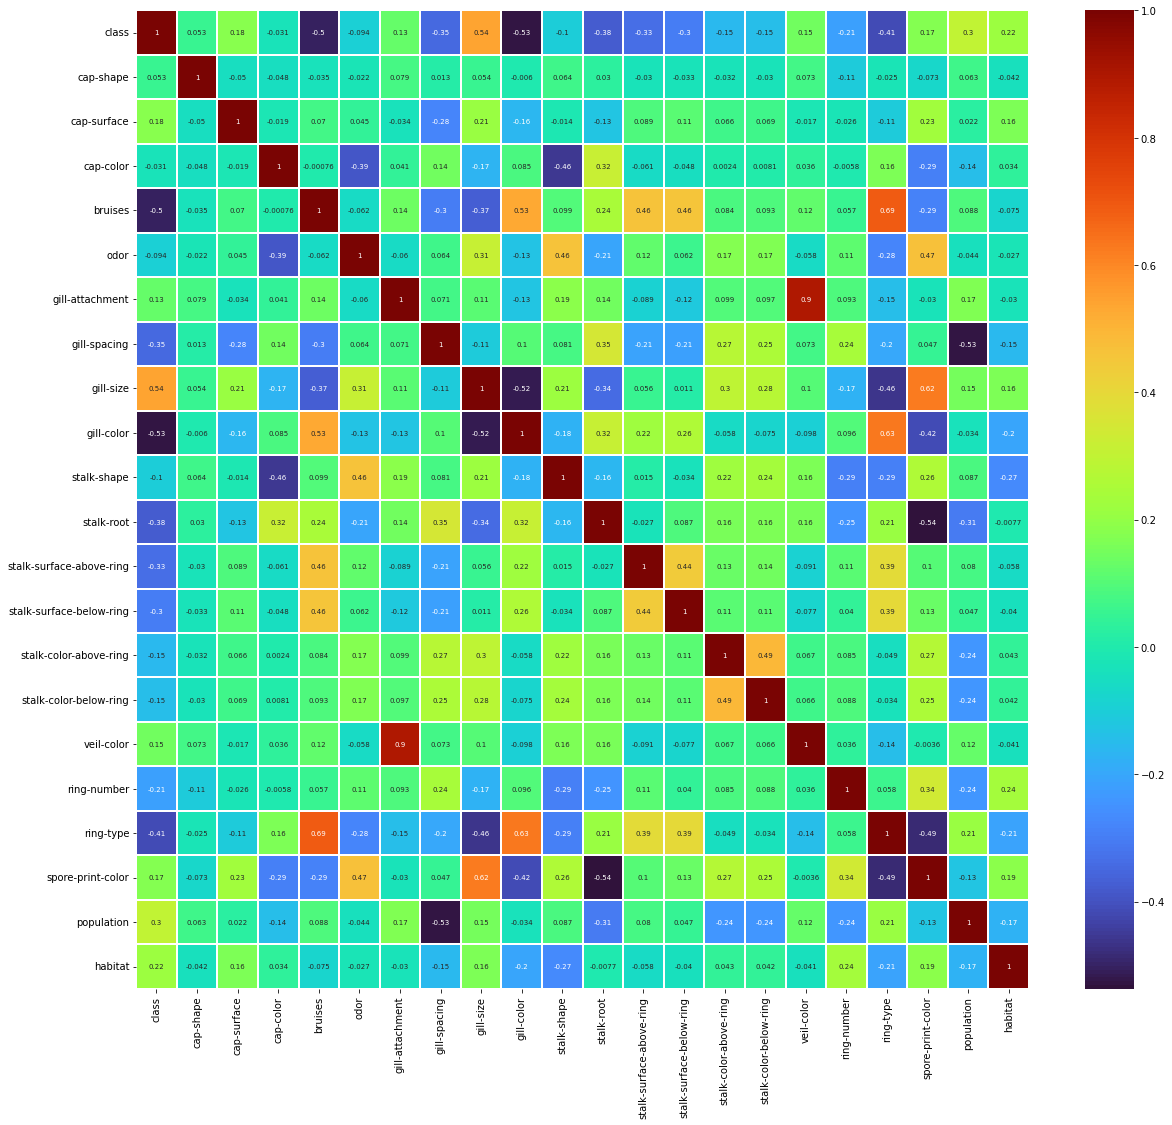

In [32]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),linewidths=.1,cmap="turbo", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

From the above heatmap we can infer that, the least corelatimg varible is gill-space.
Usually, the least correlating variable is the most important one for classification. 
In this case, “gill-color” is -0.53

In [47]:
data[['class','gill-color']].groupby('gill-color').mean().sort_values(by='class', ascending=False)

,class
gill-color,
0,1.000000
8,1.000000
3,0.721311
2,0.670213
7,0.428954
11,0.255814
10,0.204659
4,0.156863
5,0.106870


C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


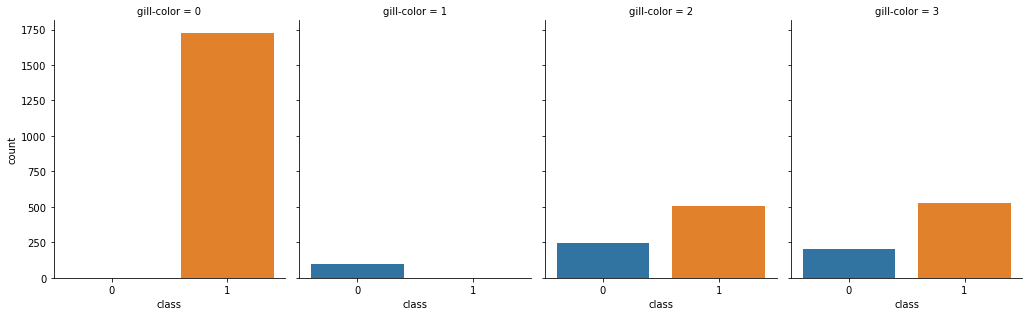

In [48]:
new_var = data[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


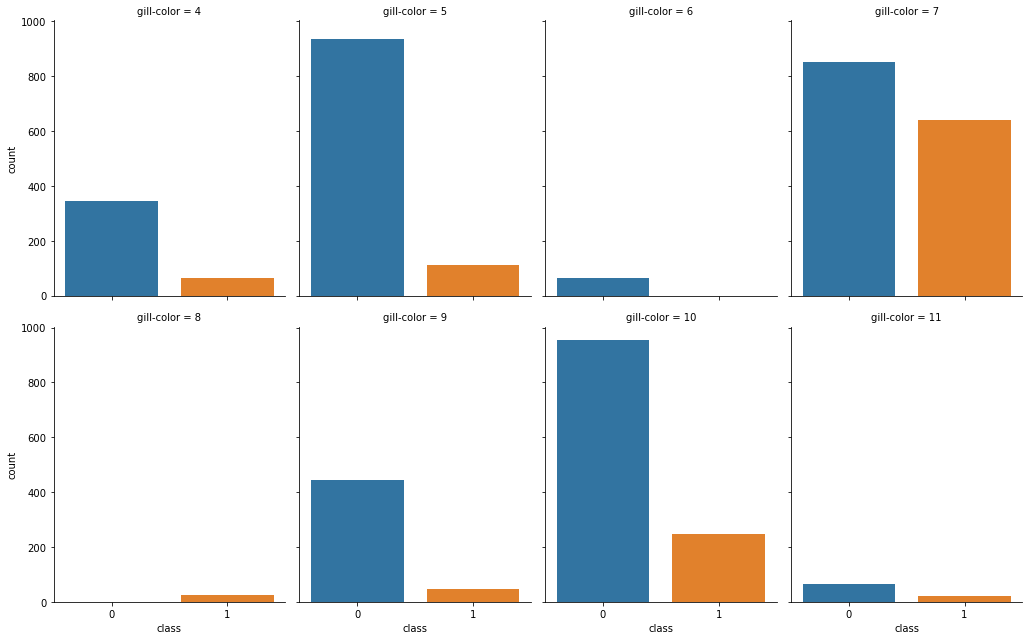

In [39]:
new_var = data[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

In [ ]:
Also, veil_colr and gill-spacing are highly corelated. Hence dropping one of the column 

In [49]:
data.drop('veil-color',axis=1,inplace=True)

# Data Preparation:

In [55]:
X=data.drop(['class'],axis=1)
y=data['class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Classification Methods

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

print(confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.0%
[[843   0]
 [  0 782]]


# Logistic Regression Classification

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.22%


In [65]:
y_pred_dt = lr.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.94       843
           1       0.94      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

[[797  46]
 [ 48 734]]


# KNN Classification

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

acc_values=[]
neighbours=np.arange(1,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    model=classifier.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
acc_values

[0.9993846153846154,
 0.9993846153846154,
 0.9981538461538462,
 0.9981538461538462,
 0.9963076923076923,
 0.9981538461538462,
 0.9950769230769231,
 0.9944615384615385,
 0.9950769230769231,
 0.9956923076923077,
 0.9963076923076923,
 0.9938461538461538,
 0.9944615384615385,
 0.9938461538461538]

Text(0, 0.5, 'accuracy value')

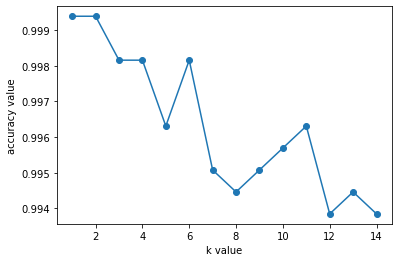

In [67]:
plt.plot(neighbours,acc_values,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy value")

In [73]:
classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski')
model=classifier.fit(X_train,y_train)
y_predict=model.predict(X_test)


print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

print("accuracy_score is",  accuracy_score(y_test,y_predict) )
print("precision_score is" ,precision_score(y_test,y_predict) )
print("recall_score is" ,recall_score(y_test,y_predict) )
print("f1_score is" ,f1_score(y_test,y_predict) )


Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.94       843
           1       0.94      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

[[797  46]
 [ 48 734]]
accuracy_score is 0.9993846153846154
precision_score is 0.9987228607918263
recall_score is 1.0
f1_score is 0.9993610223642173


# SVM Classification

In [76]:
from sklearn.svm import SVC,LinearSVC

linear_svc=LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_predictions=linear_svc.predict(X_test)

print("Test Accuracy: {}%".format(round(linear_svc.score(X_test, y_test)*100,2)))
y_pred_dt = linear_svc.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Test Accuracy: 94.03%
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.94       843
           1       0.95      0.93      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

[[801  42]
 [ 55 727]]


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Naive Bayes Classification

In [77]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.37%


In [78]:
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100,2)))
y_pred_dt = nb.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Test Accuracy: 92.37%
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93       843
           1       0.95      0.89      0.92       782

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625

[[808  35]
 [ 89 693]]


# Random Forest Classification

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [80]:
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100,2)))
y_pred_dt = rf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

Test Accuracy: 100.0%
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[843   0]
 [  0 782]]


# Predictions
Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.